In [1]:
import warnings
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
from statsmodels.tsa.seasonal import seasonal_decompose
warnings.filterwarnings('ignore')


In [2]:
def compare_timeseries(x1,y1,name1,x2,y2,name2):
    '''
    x1,y1: time series 1
    x2,y2: time series 2
    '''
    
    fig, ax1 = plt.subplots()

    color = 'tab:red'
    ax1.set_xlabel('Date')
    ax1.set_ylabel(name1, color=color) #First X-Axis label
    ax1.plot(x1, y1, color=color) #First time series
    ax1.tick_params(axis='y', labelcolor=color)
    ax1.tick_params(axis='x',rotation=45)
    
    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
    
    color = 'tab:blue'
    ax2.set_ylabel(name2, color=color) #Second X-axis label
    ax2.plot(x2, y2, color=color)  #Second time series
    ax2.tick_params(axis='y', labelcolor=color)
    ax2.tick_params(axis='x',rotation=45)
    
    fig.tight_layout()
    plt.show()

In [3]:
def plot_timeseries(x,y,graph_name,axv_value,axv_name):
    '''
    x,y: time series
    graph_name: title of graph
    axv_value: string date value of verticle line to plot
    axv_name: label of vertical line
    '''
    
    fig, ax = plt.subplots()

    color = 'tab:red'
    ax.set_xlabel('Date')
    ax.set_ylabel(graph_name, color=color) #X-Axis label
    ax.plot(x, y, color=color) #time series
    ax.tick_params(axis='y', labelcolor=color)
    ax.axvline(pd.to_datetime(axv_value), color = 'black', label = axv_name) #Line
    fig.tight_layout()
    plt.show()

### 1. Read Merged dataset

In [4]:
df = pd.read_csv('../datasets/merged_df2.csv')
df['time'] = pd.to_datetime(df['time'], format = '%Y-%m-%d')
df.set_index('time',inplace=True)
df.head()


,dengue_cases,denv_1,denv_2,denv_3,denv_4,Mean Temperature (°C),Mean Wind Speed (km/h),Daily Rainfall Total (mm),Maximum Temperature (°C),Max Wind Speed (km/h),Minimum Temperature (°C),google_trends
time,,,,,,,,,,,,
2018-04-08,38,0.000,0.505,0.484,0.011,28.528571,10.714286,0.742857,33.8,36.7,25.5,20
2018-04-15,56,0.000,0.505,0.484,0.011,28.914286,9.828571,2.057143,34.4,38.2,24.6,18
2018-04-22,55,0.000,0.505,0.484,0.011,28.142857,7.700000,0.371429,34.3,37.1,25.5,21
2018-04-29,74,0.000,0.505,0.484,0.011,28.414286,6.842857,4.800000,35.0,43.6,22.6,23
2018-05-06,62,0.029,0.549,0.382,0.039,28.785714,8.328571,3.742857,34.2,44.6,23.6,39


### 2. Comparing Dengue cases with Google Trends From 2018-2023

* The google trends spikes matches the dengue spikes

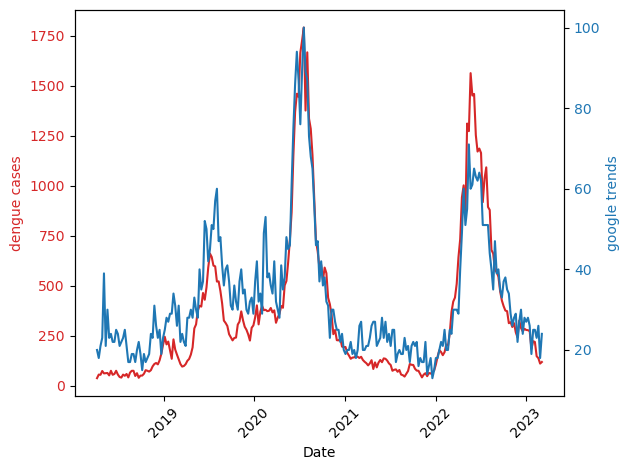

In [5]:
x=df.index
y1=df.dengue_cases
y2=df.google_trends

compare_timeseries(x,y1,'dengue cases',x,y2,'google trends')

* The 2 spikes are significantly higher than spike in 2019 after circuit breaker in 2020 April
* Vertical line is plotted on 3-Apr-23, the start of cirvuit breaker in Singapore

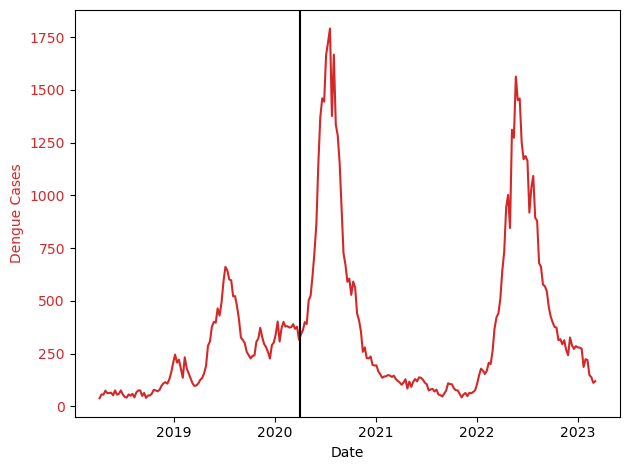

In [6]:
plot_timeseries(df.index,df.dengue_cases,'Dengue Cases','2020-04-03','Circuit Breaker')

### 3. Plot dengue time series 2012-2023
* From the above plot, the dengue cases spikes during the circuit breaker period, it might be influenced by many people staying indoors.
* Use data from original degnue cases dataset to see the pattern before 2018

In [7]:
df2 = pd.read_csv('../datasets/dengue_merged_2012_2023.csv')
df2['date'] = pd.to_datetime(df2['date'], format = '%Y-%m-%d')
df2.dropna(inplace=True)
df2 = df2.astype({"dengue_cases": int})
df2.set_index(['date'],inplace=True)
df2.head()

,dengue_cases
date,
2012-01-01,74
2012-01-08,64
2012-01-15,60
2012-01-22,50
2012-01-29,84


In [8]:
df2.isna().sum()

dengue_cases    0
dtype: int64

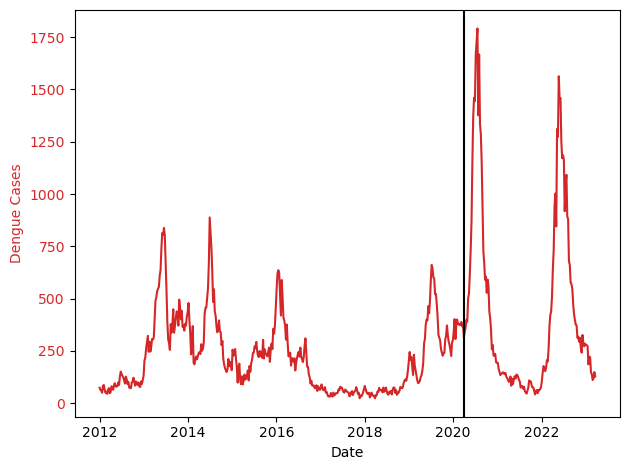

In [9]:
plot_timeseries(df2.index,df2.dengue_cases,'Dengue Cases','2020-04-03','Circuit Breaker')

### 4. Decomposing the trend of dengue cases
* Seasonal pattern: Usually peaks in July 
* Abnormally high in 2020 and 2022 July
* No peaks in 2021 July

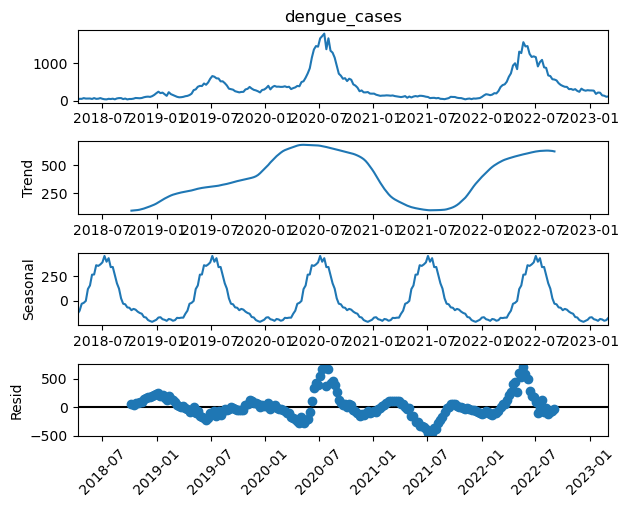

In [10]:
# 2018-2023
result = seasonal_decompose(df.dengue_cases, model='additive')
result.plot()
plt.xticks(rotation=45)
plt.show()

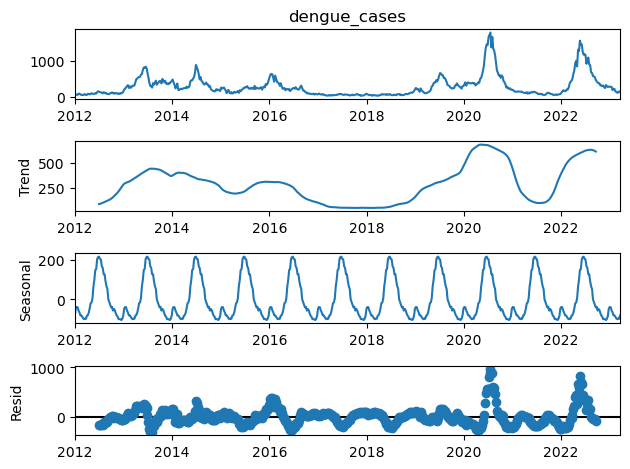

In [11]:
# 2012-2023
result = seasonal_decompose(df2.dengue_cases, model='additive')
result.plot()
plt.show()

### 5. Decomposing Google Trends


#### 5.1 Google trend from 2018-2023

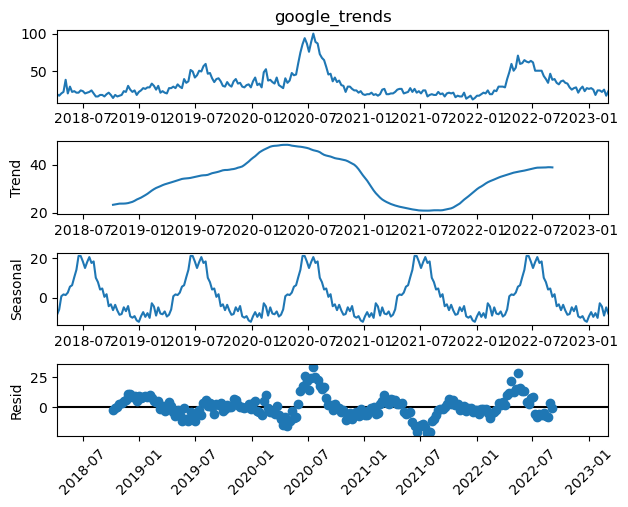

In [12]:
result = seasonal_decompose(df.google_trends, model='additive')
result.plot()
plt.xticks(rotation=45)
plt.show()

#### 5.2 Google trend from 2012-2023
* Using the extended data for monthy google trends from 2012 to 2023, we can see a similar trend with dengue cases
* There is a spike in July 2016 for google searches without a corresponding significant increase in dengue cases

In [13]:
ts = pd.read_csv('../datasets/dengue_search_trends/defined_queries_2012_2023.csv', skiprows=2)
ts['Month'] = pd.to_datetime(ts['Month'], format = '%Y-%m-%d')
ts.set_index('Month',inplace=True)
ts.rename(columns={ ts.columns[0]: "google_trend" }, inplace = True)
ts.head()

,google_trend
Month,
2012-01-01,16
2012-02-01,17
2012-03-01,15
2012-04-01,18
2012-05-01,17


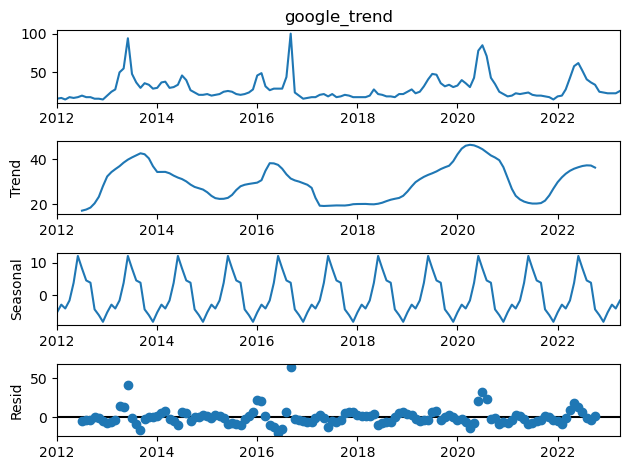

In [14]:
result = seasonal_decompose(ts.google_trend, model='additive')
result.plot()
plt.show()

### 6. Serology 
* DENV_3 is the dominant strain from 2021 onwards
* DENV_2 percentage is falling due to immunity 

In [15]:
df.columns

Index(['dengue_cases', 'denv_1', 'denv_2', 'denv_3', 'denv_4',
       'Mean Temperature (°C)', 'Mean Wind Speed (km/h)',
       'Daily Rainfall Total (mm)', 'Maximum Temperature (°C)',
       'Max Wind Speed (km/h)', 'Minimum Temperature (°C)', 'google_trends'],
      dtype='object')

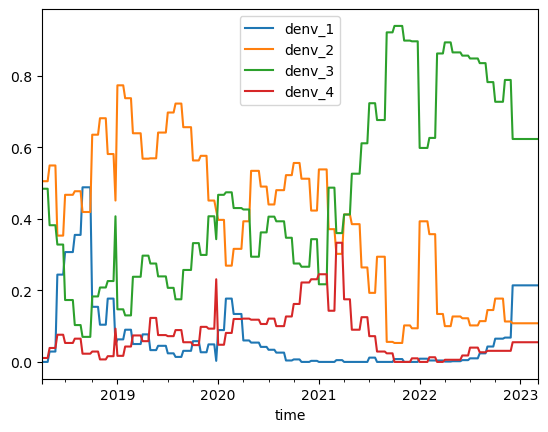

In [16]:
serology = df[['denv_1', 'denv_2', 'denv_3', 'denv_4']]
serology.plot()
plt.show()

* Abnormally high spikes in July 2020 and 2022 is due to DENV_3
* DENV_3 is dropping in 2023

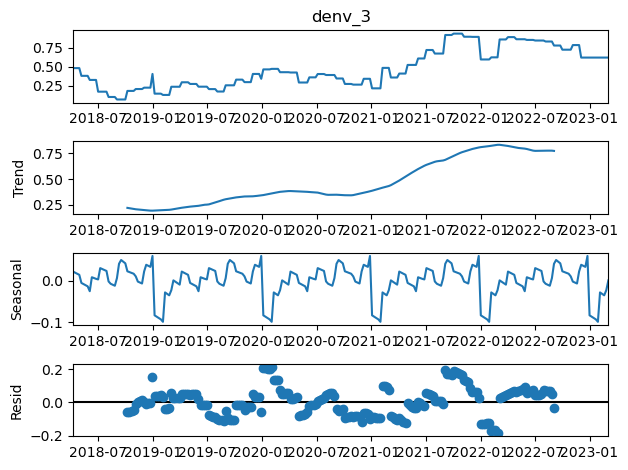

In [17]:
result = seasonal_decompose(df.denv_3, model='additive')
result.plot()
plt.show()

* DENV_1 is rising in 2023
* Subsequent dengue spikes in 2023 maybe a mixture of DENV_3 and DENV_1 cases

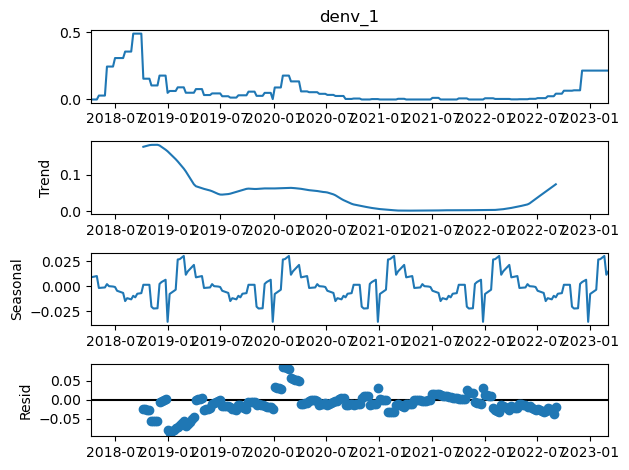

In [18]:
result = seasonal_decompose(df.denv_1, model='additive')
result.plot()
plt.show()

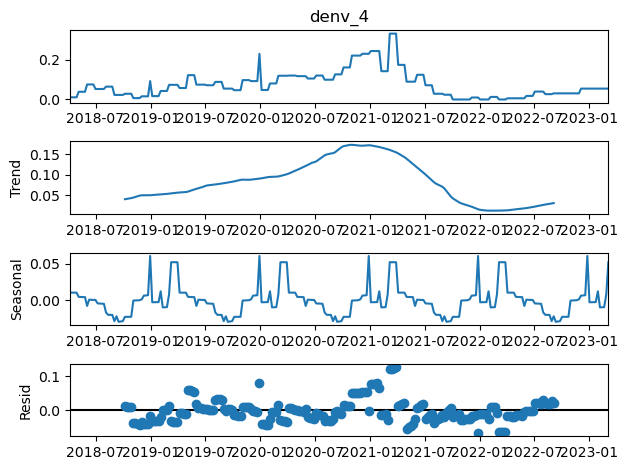

In [19]:
result = seasonal_decompose(df.denv_4, model='additive')
result.plot()
plt.show()

### 7. Finding correlation between features and dengue cases time series
* Split time series by year and see correlation between each year and each feature


In [20]:
df.columns

Index(['dengue_cases', 'denv_1', 'denv_2', 'denv_3', 'denv_4',
       'Mean Temperature (°C)', 'Mean Wind Speed (km/h)',
       'Daily Rainfall Total (mm)', 'Maximum Temperature (°C)',
       'Max Wind Speed (km/h)', 'Minimum Temperature (°C)', 'google_trends'],
      dtype='object')

In [21]:
df['year'] = df.index.year
df['date'] = df.index.strftime('%m-%d')
df['week_number'] = df.index.isocalendar().week
# Find and plot the most correlated time-series
unstacked = df.set_index(['year', 'week_number']).unstack(-2)
unstacked.head()

dengue_cases                                    denv_1         \
year                2018   2019   2020   2021   2022   2023   2018   2019   
week_number                                                                 
1                    NaN  245.0  342.0  165.0  146.0  278.0    NaN  0.063   
2                    NaN  207.0  402.0  151.0  178.0  273.0    NaN  0.063   
3                    NaN  221.0  307.0  135.0  169.0  186.0    NaN  0.063   
4                    NaN  179.0  370.0  141.0  153.0  223.0    NaN  0.063   
5                    NaN  135.0  400.0  142.0  168.0  219.0    NaN  0.090   

                         ... google_trends                   date         \
year          2020 2021  ...          2020  2021  2022  2023 2018   2019   
week_number              ...                                               
1            0.089  0.0  ...          37.0  20.0  18.0  28.0  NaN  01-06   
2            0.089  0.0  ...          42.0  20.0  20.0  26.0  NaN  01-13   
3            0.089  0.0  ...          32.0  22.0  22.0  19.0  NaN  01-20   
4            0.089  0.0  ...          34.0  19.0  21.0  25.0  NaN  01-27   
5            0.177  0.0  ...          29.0  20.0  25.0  25.0  NaN  02-03   

                                         
year          2020   2021   2022   2023  
week_number                              
1            01-05  01-10  01-09  01-08  
2            01-12  01-17  01-16  01-15  
3            01-19  01-24  01-23  01-22  
4            01-26  01-31  01-30  01-29  
5            02-02  02-07  02-06  02-05  

[5 rows x 78 columns]

### 8. Finding correlation between features and dengue cases time series for 2018 to 2023
* Strong correlation between dengue_cases and google_trends
* Negative correlation between Mean temperature and rainfall


In [23]:
features = ['Mean Temperature (°C)', 'Mean Wind Speed (km/h)',
       'Daily Rainfall Total (mm)', 'Maximum Temperature (°C)',
       'Max Wind Speed (km/h)', 'Minimum Temperature (°C)','dengue_cases','google_trends']

In [41]:
dataCorr = df[features].corr(method='pearson')
dataCorr = dataCorr.mask(np.tril(np.ones(dataCorr.shape)).astype(np.bool))
dataCorr = dataCorr[abs(dataCorr) >= 0.3].stack().reset_index()
print (dataCorr)

                     level_0                    level_1         0
0      Mean Temperature (°C)  Daily Rainfall Total (mm) -0.519492
1      Mean Temperature (°C)   Maximum Temperature (°C)  0.642291
2      Mean Temperature (°C)   Minimum Temperature (°C)  0.482721
3     Mean Wind Speed (km/h)   Minimum Temperature (°C)  0.372634
4  Daily Rainfall Total (mm)   Minimum Temperature (°C) -0.446208
5               dengue_cases              google_trends  0.930977


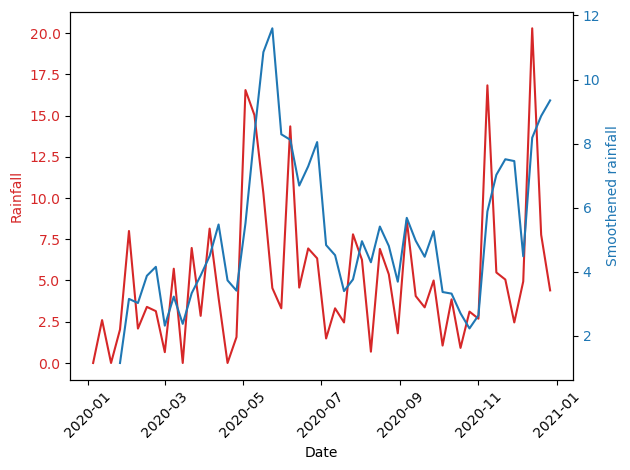

In [25]:
#Seeing the effect of smoothing using rolling average
compare_timeseries(df[df['year']==2020].index,
                   df[df['year']==2020]['Daily Rainfall Total (mm)'],
                   'Rainfall',
                   df[df['year']==2020].index,
                   df[df['year']==2020]['Daily Rainfall Total (mm)'].rolling(4).mean(),
                   'Smoothened rainfall')

### 9. Zooming into each year and visualise the correlation between temperature and rainfall
* Smooth out the series with rolling window of 4 weeks
* Positive Correlation between minimum temperature and rainfall
* Negative Correlation between mean temperature and rainfall

In [26]:
def compare_features(year1,year2,feature1,feature2,window):
    compare_timeseries(df[(df['year']>=year1) & (df['year']<=year2)].index,
                   df[(df['year']>=year1) & (df['year']<=year2)][feature1].rolling(window).mean(),
                   feature1,
                   df[(df['year']>=year1) & (df['year']<=year2)].index,
                   df[(df['year']>=year1) & (df['year']<=year2)][feature2].rolling(window).mean(),
                   feature2)

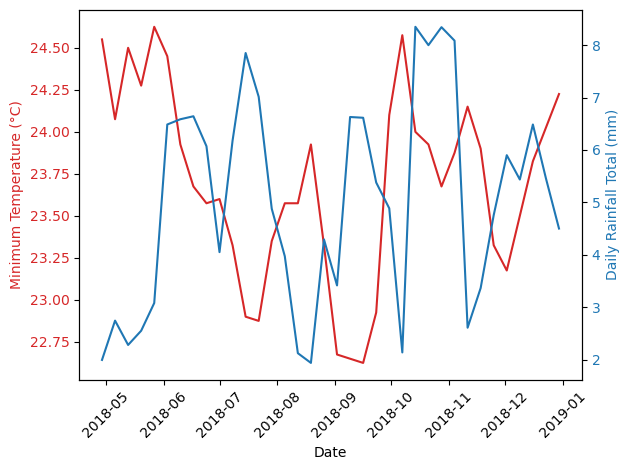

In [27]:
compare_features(2018,2018,'Minimum Temperature (°C)','Daily Rainfall Total (mm)',4)

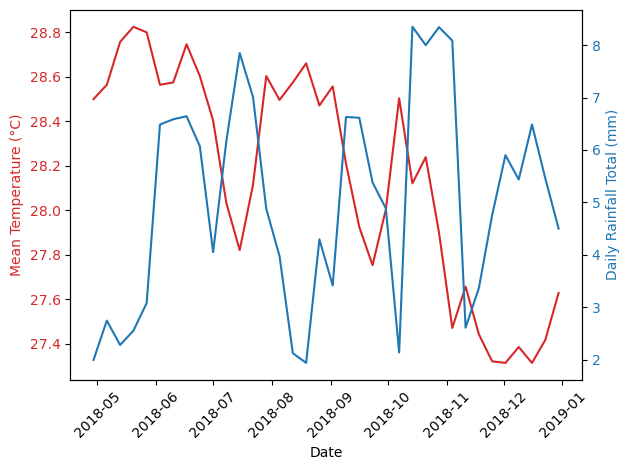

In [28]:
compare_features(2018,2018,'Mean Temperature (°C)','Daily Rainfall Total (mm)',4)

### 10. Zooming into each year and find out the relationship between rainfall and dengue cases
* Smooth out the series with rolling window of 4 weeks
* As per above findings, there is little correlation between rainfall and dengue cases
* There is a one month negative lag, usally a period of higher rainfall precedes before dengue cases spikes

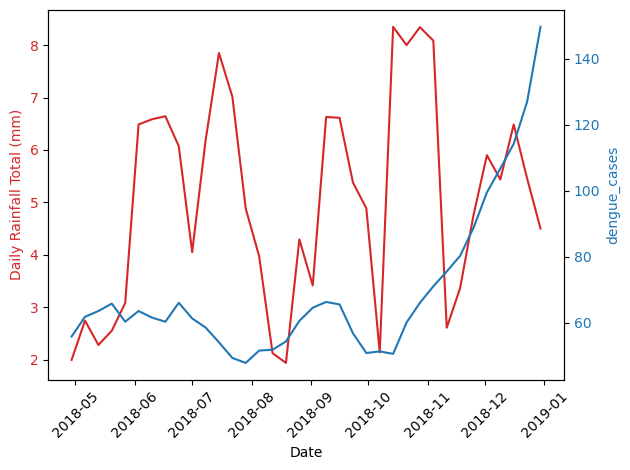

In [30]:
compare_features(2018,2018,'Daily Rainfall Total (mm)','dengue_cases',4)

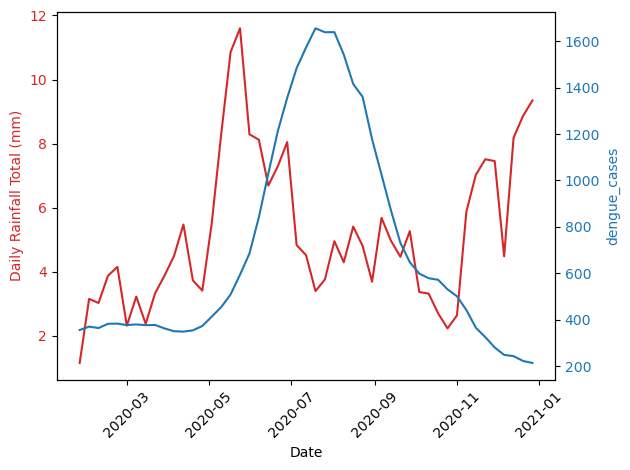

In [31]:
compare_features(2020,2020,'Daily Rainfall Total (mm)','dengue_cases',4)

### 11. Observing the lag time between Periods of high rainfall and dengue cases
* Dengue spikes precedes with high rainfall
* Life cycle of a mosquito is 42 – 56 days for an adult female mosquito
* 8-10 days from egg to larva to pupa to adult mosquito
* Around 1 month as adult mosquito
* High rainfall usually starts 1 month before the spike in dengue cases
* Sometimes high rainfall will not result in spikes
* High temperature coincides with dengue spikes

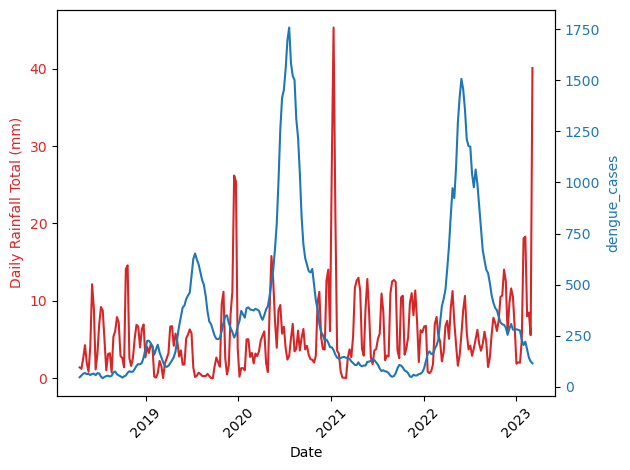

In [32]:
compare_features(2018,2023,'Daily Rainfall Total (mm)','dengue_cases',2)

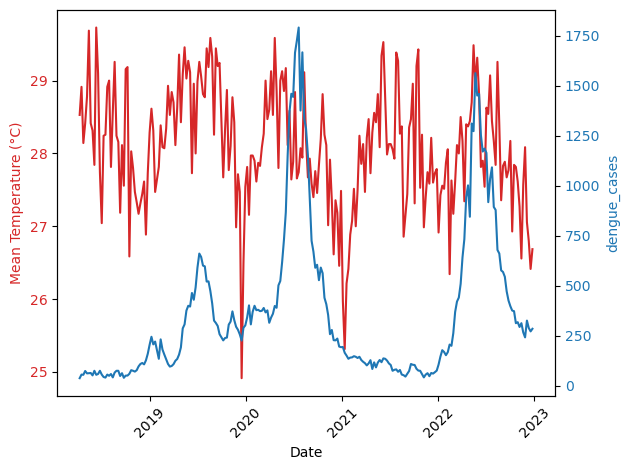

In [33]:
# Weather factors can help to predict dengue outbreaks
compare_features(2018,2022,'Mean Temperature (°C)','dengue_cases',1)

### 12. Observing the months with highest dengue cases, rainfall and temperature
* Dengue cases usually peaks in the months of May to August
* Overlaps with the time of lower rainfall and warmer temperatures conducive for mosquito growth and activity
* Dengue cases are significantly higher post-covid

Text(0.5, 0, 'Month')

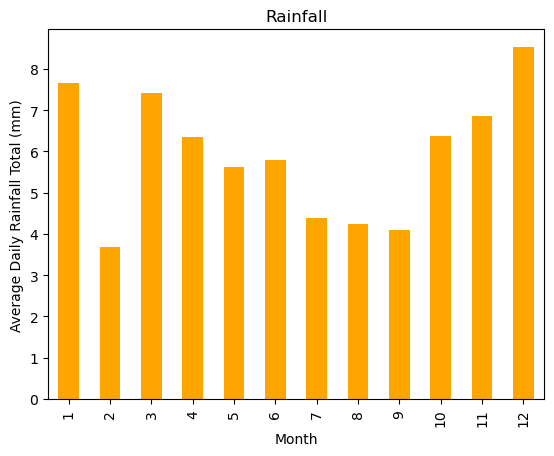

In [34]:
# Month of high rainfall
df['Daily Rainfall Total (mm)'].groupby(df.index.month).mean().plot(kind="bar",color='orange')
plt.title('Rainfall')
plt.ylabel('Average Daily Rainfall Total (mm)')
plt.xlabel('Month')


Text(0.5, 0, 'Months')

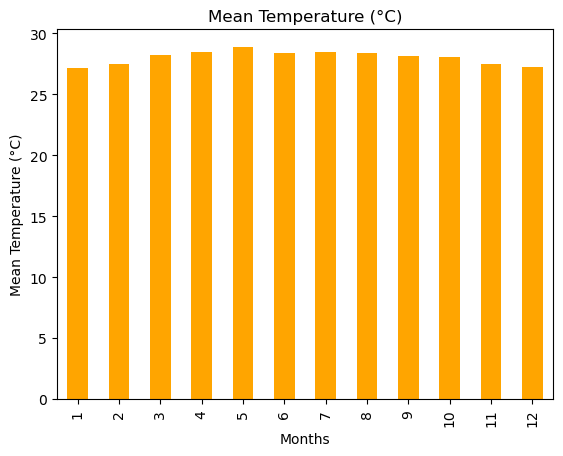

In [35]:
# Month of high temperature
df['Mean Temperature (°C)'].groupby(df.index.month).mean().plot(kind="bar",color='orange')
plt.title('Mean Temperature (°C)')
plt.ylabel('Mean Temperature (°C)')
plt.xlabel('Months')


* Typically, May to August is the spike of dengue cases every year
* The width of the dengue spikes is about 3-4 months

Text(0.5, 0, 'Month')

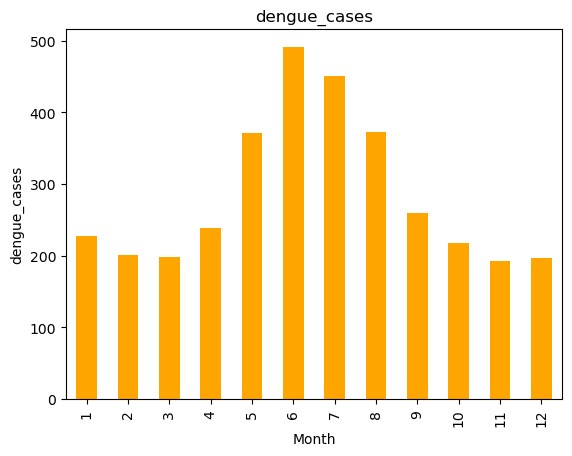

In [36]:
# Dengue cases from 2012 to 2023
df2['dengue_cases'].groupby(df2.index.month).mean().plot(kind="bar",color='orange')
plt.title('dengue_cases')
plt.ylabel('dengue_cases')
plt.xlabel('Month')


Text(0.5, 0, 'Month')

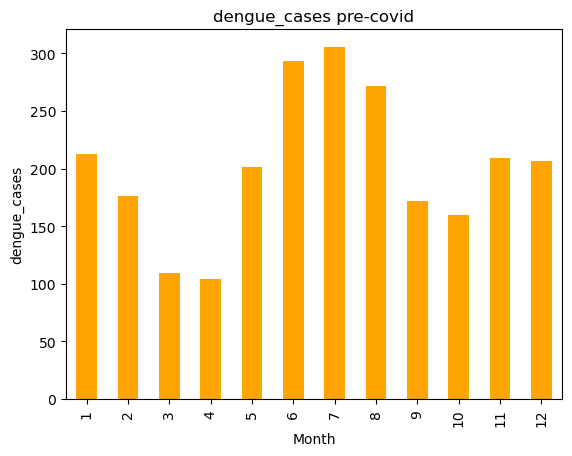

In [37]:
# Dengue cases before covid
df[df['year']<2020]['dengue_cases'].groupby(df[df['year']<2020].index.month).mean().plot(kind="bar",color='orange')
plt.title('dengue_cases pre-covid')
plt.ylabel('dengue_cases')
plt.xlabel('Month')


Text(0.5, 0, 'Month')

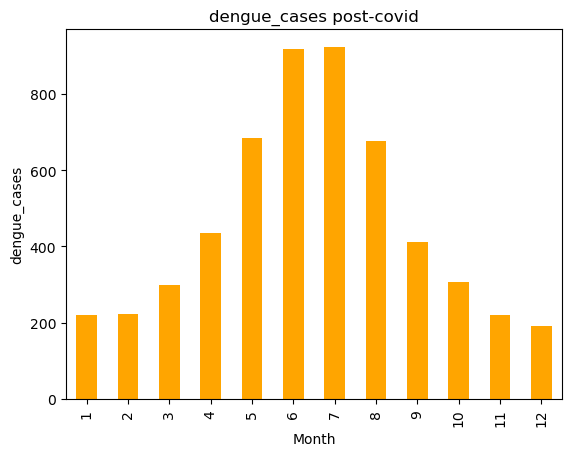

In [38]:
# Dengue cases after covid
df[df['year']>=2020]['dengue_cases'].groupby(df[df['year']>=2020].index.month).mean().plot(kind="bar",color='orange')
plt.title('dengue_cases post-covid')
plt.ylabel('dengue_cases')
plt.xlabel('Month')